<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/7.%20Deep%20Learning%20CNN/3_DeepLearning_ConvolutionNeuralNetworks_CATSDOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning For Object Detection and Image Classification

<h3 align='center'> Deep Learning on Custom Images </h3>

How to work with our own custom image data sets (raw images and how to resize them)

- The dataset 'Cats and Dogs' is 774 MB and is uploaded on google drive
- using <i> flow_from_directory </i> we can extract images to Colab environment

In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Checking GPU available on Colab

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

'''
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
'''

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.
Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


'\n%tensorflow_version 2.x\nimport tensorflow as tf\nprint("Tensorflow version " + tf.__version__)\n\ntry:\n  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection\n  print(\'Running on TPU \', tpu.cluster_spec().as_dict()[\'worker\'])\nexcept ValueError:\n  raise BaseException(\'ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!\')\n\ntf.config.experimental_connect_to_cluster(tpu)\ntf.tpu.experimental.initialize_tpu_system(tpu)\ntpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)\n'

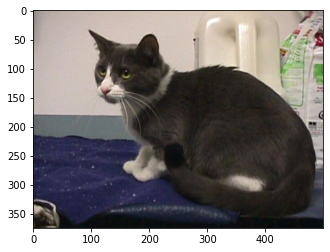

In [3]:
# Reading a single image from the drive

#First need to mount the drive and copy the path of the image

cat4 = cv2.imread('/content/drive/MyDrive/CATS_DOGS_data/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [4]:
cat4.shape #three color channel

(375, 500, 3)

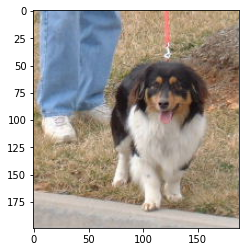

In [5]:
#Lets upload a DOG

dog = cv2.imread('/content/drive/MyDrive/CATS_DOGS_data/CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [6]:
dog.shape

(199, 188, 3)

So we see images are not same size. So to make sure everytime we have any image, we need to pre-process the image. In Keras, we have a function <b> automatically process data and generate flow of batches from a directory -- > ImageDataGenerator</b> 

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# not only size will be different, there will be image fluctuations such as side or top view so that images are clearly visible.

image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',)


#rotation range = randomly rotate images (minor)
#width_shift_range = shift the width a bit along x axis (%)
#height_shift_range = shift the height a bit along y axis (%)
#rescale = normalize by 255
#shear_range = cuts away part of the image
#zoom_range = zoom image
#horizontal_flip = along y axis
#vertical_flip = along x axis
#When we rescale, shifting, zoom, sheaer, there might be some missing pixels so we can fill those pixels by nearest pixel size

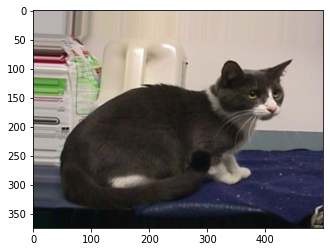

In [8]:
plt.imshow(image_gen.random_transform(cat4))

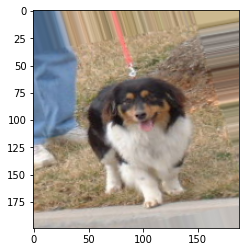

In [9]:
plt.imshow(image_gen.random_transform(dog)) #View 1

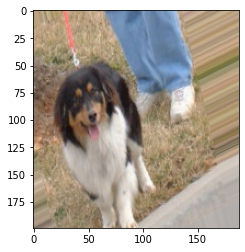

In [10]:
plt.imshow(image_gen.random_transform(dog)) #View 2

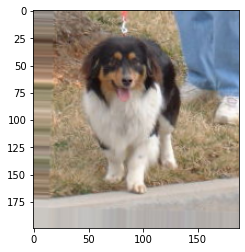

In [11]:
plt.imshow(image_gen.random_transform(dog)) #View 3

In [12]:
image_gen.flow_from_directory('/content/drive/MyDrive/CATS_DOGS_data/CATS_DOGS/train')

Found 13409 images belonging to 2 classes.


In [13]:
#Build and train out model now

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation

input_shape=(150,150,3)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #randomly turned 50% off neurons - help in overfitting

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [15]:
batch_size= 16

train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/CATS_DOGS_data/CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/CATS_DOGS_data/CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 13409 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [16]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Using epochs = 30 to achieve > 70% accuracy and can run 100 epochs to have 85 % accuracy

results = model.fit_generator(train_image_gen,epochs=30,steps_per_epoch=150,
                              validation_data=test_image_gen,validation_steps=12) #150*16 iamges per epoch to save training time

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
150/150 [==============================] - 1140s 8s/step - loss: 0.6269 - accuracy: 0.7042 - val_loss: 1.0251 - val_accuracy: 0.5156
Epoch 2/30
150/150 [==============================] - 962s 6s/step - loss: 0.6262 - accuracy: 0.6812 - val_loss: 0.7153 - val_accuracy: 0.5260
Epoch 3/30
150/150 [==============================] - 780s 5s/step - loss: 0.6049 - accuracy: 0.7096 - val_loss: 0.7869 - val_accuracy: 0.4948
Epoch 4/30
150/150 [==============================] - 730s 5s/step - loss: 0.6008 - accuracy: 0.7025 - val_loss: 0.6292 - val_accuracy: 0.6458
Epoch 5/30
150/150 [==============================] - 564s 4s/step - loss: 0.5988 - accuracy: 0.7000 - val_loss: 0.7419 - val_accuracy: 0.5365
Epoch 6/30
150/150 [==============================] - 502s 3s/step - loss: 0.5988 - accuracy: 0.7133 - val_loss: 0.7358 - val_accuracy: 0.5469
Epoch 7/30
150/150 [==============================] - 413s 3s/ste

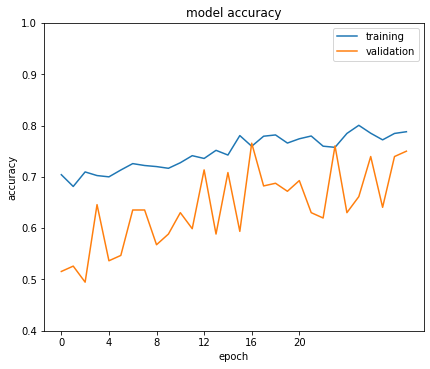

In [18]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])
  ax.set_ylim(0.4,1)
  ax.set_xticks([0,4,8,12,16,20])

plt.subplots(figsize=(6,10))
plt.tight_layout()
display_training_curves(results.history['accuracy'], results.history['val_accuracy'], 'accuracy', 211)

##### Prediction on images

In [24]:
from keras.preprocessing import image
import numpy as np

dog_file = '/content/drive/MyDrive/CATS_DOGS_data/CATS_DOGS/test/DOG/10000.jpg'
dog_img = image.load_img(dog_file,target_size=(150,150)) 
dog_img = image.img_to_array(dog_img) # to array #dog_img.shape = 150,150,3

#but we need to covnert this iamge to a batch so NN thinks it is a batch of 1 with this iamge dimensions

dog_img = np.expand_dims(dog_img,axis=0) #now dog_img.shape = 1,150,150,3

dog_img = dog_img/255 #normalize

In [25]:
model.predict_classes(dog_img) #to predict class

array([[1]], dtype=int32)

In [26]:
#to check accuracy

model.predict(dog_img)

array([[0.8145528]], dtype=float32)